# Third Laboratory
### Group "Trap" - Data Science for Business 2022

Oh no! My attempt on analyzing the impact COVID had on the job market failed miserably :(

Some alien ate part of my data, and now it's gone for good! For some reason this creature divoured all the record after the 12th day of each month. What a strange (and cruel) creature!

![](./res/pacman.png)

I'm now left with an incomplete dataset, so my question now is: **will it be enough to produce good predictions?**

Luckily I found, on another source, a complete dataset that the beast was not able to find... yet. I will use this one to compare the prediction results although it has some problems:

* The data is aggregated by trimester, so not much data points
* The period is limited to 2016-2021, while the original one had a good amount of data from 2009. Even fewer data points!

### Am I doomed? Probably I am.

# Let's start!

In [3]:
data_path = "~/data/"

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

## Loading *incomplete* dataset

Here we load the incomplete dataset and rework it to make it similar to the complete one we found:

- Aggregated by trimester
- With macro-cateogories for GENERE and PROVINCIAIMPRESA and nothing else

In [117]:
def prepare_dataset(path): 
    ds = pd.read_csv(path)
    ds["DATA"] = pd.to_datetime(ds["DATA"], dayfirst=True, errors="coerce")
    ds = ds.sort_values("DATA", ignore_index=True)
        
    # From previous labs we already know there is one record with invalid date, 
    # let's remove it
    ds = ds[ds['DATA'].notna()]
    
    # Creating column MESE e ANNO
    ds['MESE'] = ds['DATA'].dt.month
    ds['ANNO'] = ds['DATA'].dt.year
    
    # Create column TRIM so that data is divided in trimesters
    ds['TRIM'] = ds['MESE'].apply(lambda x : math.ceil(x/3))
    
    trims = [(x, y) for x in range(2016, 2022) for y in range(1, 5)]
    return ds.groupby(["ANNO", "TRIM"]).size().reindex(trims)

jobs = prepare_dataset(data_path + "Rapporti_di_lavoro_attivati.csv")
ceased = prepare_dataset(data_path + "Rapporti_di_lavoro_cessati.csv")

## Loading *complete* dataset

Here we load the dataset we found [here](https://quadrantelavoro.regione.lombardia.it/pentaho/content/pentaho-cdf-dd/Render?solution=dasLombardia&path=%2FcruscottoComObb&file=com_obb_genere.wcdf&anno_i=undefined&anno_f=2020&territorio=Regione).


In [1]:
def prepare_dataset(path): 
    ds = pd.read_csv(path, sep=';')
    
    # Create column ANNO
    ds['ANNO'] = ds['Trimestre'].apply(lambda x: int(x[-4:]))
    
    # Create column TRIM so that data is divided in trimesters
    def trimester(x):
        if x[0:5] == 'Primo':
            return 1
        elif x[0:7] == 'Secondo':
            return 2
        elif x[0:5] == 'Terzo':
            return 3
        else:
            return 4
    
    ds['TRIM'] = ds['Trimestre'].apply(trimester)

    # Fix column names
    ds.rename(str.upper, axis='columns', inplace=True)
    
    # Groupby and reindex
    trims = [(x, y, z) for x in range(2016, 2022) for y in range(1, 5) for z in ['M', 'F']]
    return ds.groupby(["ANNO", "TRIM"]).sum().reindex(trims)

q_jobs = prepare_dataset(data_path + "Quadrante_avviamenti.csv")
q_ceased = prepare_dataset(data_path + "Quadrante_cessazioni.csv")

NameError: name 'data_path' is not defined

## Joining into a single DataFrame

In [124]:
jmarket = pd.concat([jobs, ceased, q_jobs, q_ceased], axis=1).rename(columns={
               0: "inc_jobs", 
               1: "inc_ceased", 
               "AVVIAMENTI": "real_jobs", 
               "CESSAZIONI": "real_ceased"})

jmarket

inc_jobs  inc_ceased  real_jobs  real_ceased
ANNO TRIM                                              
2016 1       173278       89475     345076       265889
     1       173278       89475     345076       265889
     2       207120       73933     321449       314225
     2       207120       73933     321449       314225
     3       200868       53405     351862       336440
     3       200868       53405     351862       336440
     4       180615       54881     358059       388994
     4       180615       54881     358059       388994
2017 1       175976       95141     367636       288780
     1       175976       95141     367636       288780
     2       249051       75210     381695       336086
     2       249051       75210     381695       336086
     3       194074       52118     392743       350807
     3       194074       52118     392743       350807
     4       227978       62292     367222       406207
     4       227978       62292     367222       406207
2018 1       178135       99458     407600       329122
     1       178135       99458     407600       329122
     2       249407       82769     397027       391011
     2       249407       82769     397027       391011
     3       234724       60054     405598       395500
     3       234724       60054     405598       395500
     4       236816       69150     394986       400733
     4       236816       69150     394986       400733
2019 1       193286      109176     408112       325317
     1       193286      109176     408112       325317
     2       243922       85888     383534       387834
     2       243922       85888     383534       387834
     3       197611       64429     411793       399977
     3       197611       64429     411793       399977
     4       239260       73836     385913       429869
     4       239260       73836     385913       429869
2020 1       159960       94023     376837       332497
     1       159960       94023     376837       332497
     2       138485       58689     218498       270622
     2       138485       58689     218498       270622
     3       172960       53075     367614       334839
     3       172960       53075     367614       334839
     4       168728       54087     357570       375282
     4       168728       54087     357570       375282
2021 1       154739       78902     326967       248290
     1       154739       78902     326967       248290
     2       146297       61420     380802       377163
     2       146297       61420     380802       377163
     3       162738       46777     454048       417048
     3       162738       46777     454048       417048
     4       158677       45037     447376       477029
     4       158677       45037     447376       477029

#### Save new dataset

In [125]:
#jmarket.to_csv(data_path + "jmarket.csv")
jmarket = pd.read_csv(data_path + "jmarket.csv", index_col=[0, 1, 2])

### So, here's the situation...

<AxesSubplot:xlabel='ANNO,TRIM'>

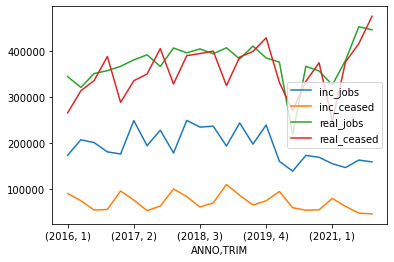

In [135]:
jmarket.plot()

<AxesSubplot:xlabel='ANNO,TRIM'>

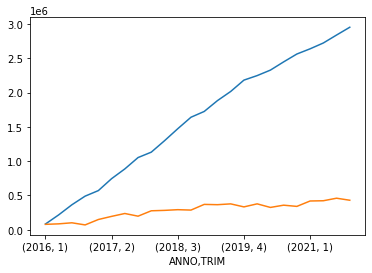

In [128]:
(jmarket['inc_jobs']-jmarket['inc_ceased']).cumsum().plot()
(jmarket['real_jobs']-jmarket['real_ceased']).cumsum().plot()

## Studying correlations

Let's check if we can use an incomplete time series to predict the complete one.

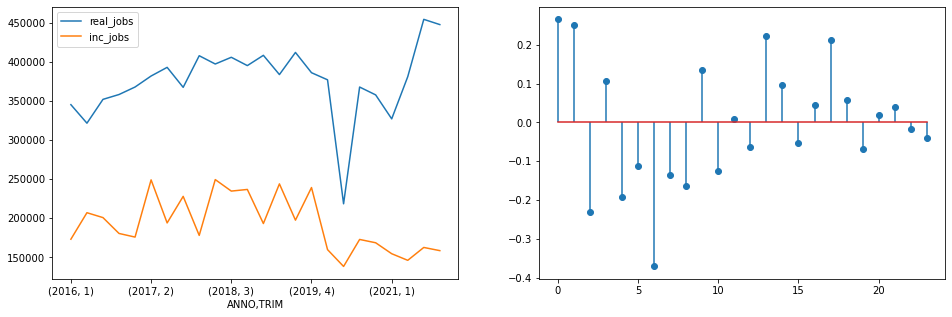

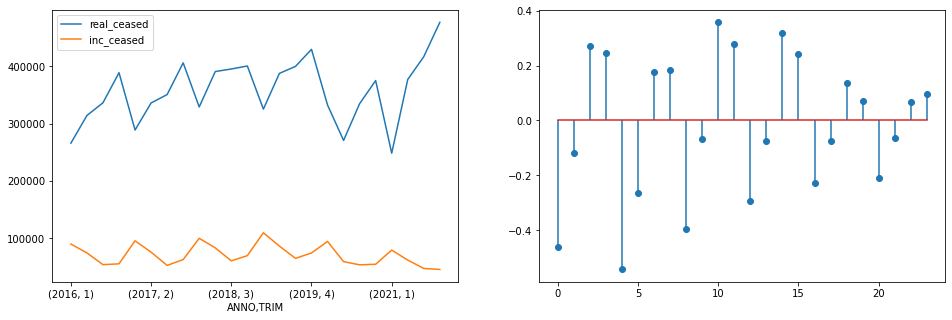

In [144]:
import statsmodels.api as sm

def corr(ds, key1, key2):
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    ds[[key1, key2]].plot(ax=plt.gca())
    plt.subplot(1,2,2)
    plt.stem(sm.tsa.stattools.ccf(ds[key1], ds[key2], adjusted=False))
    plt.show()
        
corr(jmarket, 'real_jobs', 'inc_jobs')
corr(jmarket, 'real_ceased', 'inc_ceased')

# Considerations

The correlation between the *incomplete* and *real* is weak, so...

- we can't use (imho) the _incomplete_ dataset to make forecasts
- we can't user the _real_ dataset either, because it has to few data points

The main problem apparently is with ceased contracts: it does appear that the day of the month really has an impact on them, probably related to the fact that most contracts are ceased at the end of the month, especially for those that . Started jobs have a stronger correlation to the real data, but not strong enough yet.

### Hypotesis: What if we only consider started jobs with "Tempo Indeterminato"?

That sounds like it could be less affected by intra-month variations.


In [195]:
def prepare_dataset(path): 
    ds = pd.read_csv(path)
    ds["DATA"] = pd.to_datetime(ds["DATA"], dayfirst=True, errors="coerce")
    ds = ds.sort_values("DATA", ignore_index=True)
        
    # From previous labs we already know there is one record with invalid date, 
    # let's remove it
    ds = ds[ds['DATA'].notna()]
    
    # Creating column MESE e ANNO
    ds['MESE'] = ds['DATA'].dt.month
    ds['ANNO'] = ds['DATA'].dt.year
    
    # Create column TRIM so that data is divided in trimesters
    ds['TRIM'] = ds['MESE'].apply(lambda x : math.ceil(x/3))
    
    # Select only "Tempo Indeterminato" jobs
    ds = ds[ds['CONTRATTO'].isin(["LAVORO A TEMPO INDETERMINATO",
                                  "LAVORO DOMESTICO A TEMPO INDETERMINATO",
                                  "LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIONE) A TEMPO INDETERMINATO",
                                  "LAVORO DIPENDENTE NELLA P.A. A TEMPO INDETERMINATO",
                                  "CONTRATTO DI AGENZIA A TEMPO INDETERMINATO",
                                  "LAVORO NELLO SPETTACOLO A TEMPO INDETERMINATO",
                                  "ASSOCIAZIONE IN PARTECIPAZIONE A TEMPO INDETERMINATO",
                                  "LAVORO MARITTIMO A TEMPO INDETERMINATO",
                                  "LAVORO RIPARTITO A TEMPO INDETERMINATO",
                                  "Lavoro a tempo indeterminato con piattaforma"])]
    
    trims = [(x, y) for x in range(2016, 2022) for y in range(1, 5)]
    return ds.groupby(["ANNO", "TRIM"]).size().reindex(trims)

jobs_ind = prepare_dataset(data_path + "Rapporti_di_lavoro_attivati.csv")
ceased_ind = prepare_dataset(data_path + "Rapporti_di_lavoro_cessati.csv")

In [196]:
def prepare_dataset(path): 
    ds = pd.read_csv(path, sep=';')
    
    # Create column ANNO
    ds['ANNO'] = ds['Trimestre'].apply(lambda x: int(x[-4:]))
    
    # Create column TRIM so that data is divided in trimesters
    def trimester(x):
        if x[0:5] == 'Primo':
            return 1
        elif x[0:7] == 'Secondo':
            return 2
        elif x[0:5] == 'Terzo':
            return 3
        else:
            return 4
    
    ds['TRIM'] = ds['Trimestre'].apply(trimester)
    
    # Select only "Tempo Indeterminato" jobs
    ds = ds[ds['Contratto'].isin(["Tempo Indeterminato"])]
    
    # Fix column names
    ds.rename(str.upper, axis='columns', inplace=True)
    
    # Groupby and reindex
    trims = [(x, y) for x in range(2016, 2022) for y in range(1, 5)]
    return ds.groupby(["ANNO", "TRIM"]).sum().reindex(trims)

q_jobs_ind = prepare_dataset(data_path + "Quadrante_avviamenti_contratto.csv")
q_ceased_ind = prepare_dataset(data_path + "Quadrante_cessazioni_contratto.csv")

In [197]:
jmarket_ind = pd.concat([jobs_ind, ceased_ind, q_jobs_ind, q_ceased_ind], axis=1).rename(columns={
               0: "inc_jobs", 
               1: "inc_ceased", 
               "AVVIAMENTI": "real_jobs", 
               "CESSAZIONI": "real_ceased"})

jmarket_ind

inc_jobs  inc_ceased  real_jobs  real_ceased
ANNO TRIM                                              
2016 1        29873       54029     109401        92484
     2        27375       42878      91871        92410
     3        24655       27293      94495        92760
     4        22422       27643      96679       101009
2017 1        24875       55567     100005        96910
     2        24839       39450      92640        95625
     3        19600       24473      90830        96781
     4        20988       28475      85201       102178
2018 1        26079       55237     111862        95280
     2        29110       41933      97855        96373
     3        23746       26553      98088        97432
     4        24584       30354      97741       108939
2019 1        31923       62988     125510       101251
     2        33531       45940      98839       102581
     3        26655       30538      99711       102721
     4        30130       33478      91984       116753
2020 1        26097       55910     115325        94857
     2        18371       31533      56594        59872
     3        20889       25973      83236        89062
     4        20172       25196      83789        95920
2021 1        27247       47043      88520        85245
     2        21271       34344      87131       102259
     3        22023       23856     101890       110545
     4        19585       22167     100618       128599

<AxesSubplot:xlabel='ANNO,TRIM'>

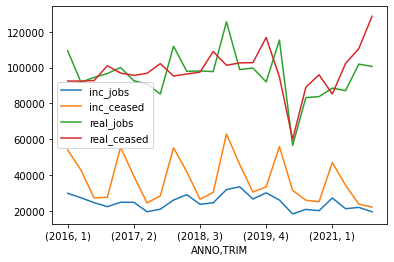

In [198]:
jmarket_ind.plot()

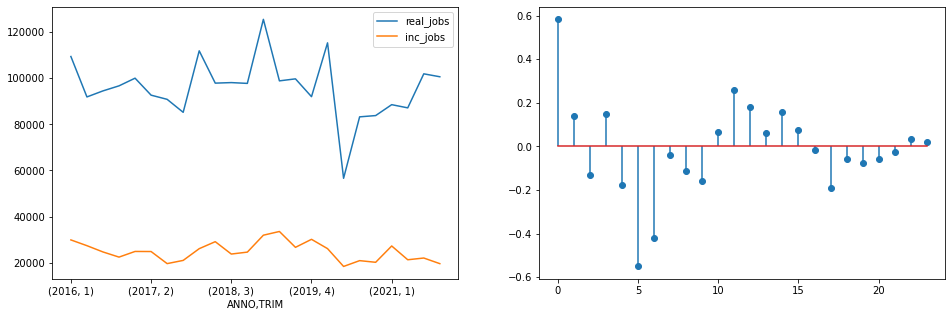

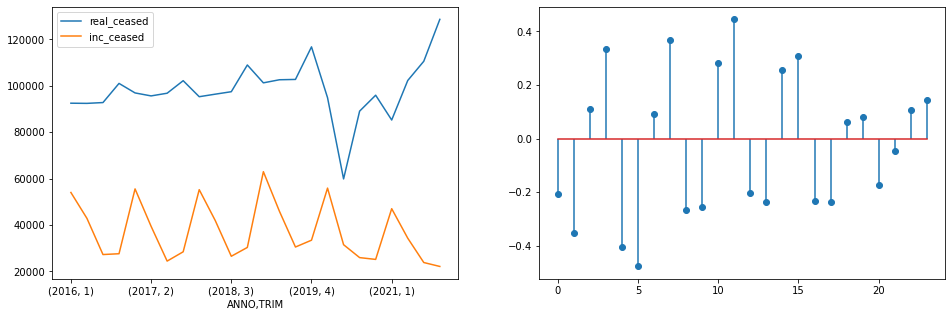

In [199]:
corr(jmarket_ind, 'real_jobs', 'inc_jobs')
corr(jmarket_ind, 'real_ceased', 'inc_ceased')

## What changed?

Whereas ceased contracts still have a bad correlation, started contracts have a pretty decent one of 0.6, which probably is still not good enough to make predictions...

### ...but let's do it anyway, because why not!

## Let's load the (incomplete) dataset, merge it with Ateco codes, and filter only Tempo Indeterminato contracts

In [122]:
#Load Ateco
ateco = pd.read_csv(data_path + "CodiciAteco.csv")
ateco["Descrizione_ateco"] = ateco["Descrizione_ateco"].str.split(" - ", expand=True)[1]
ateco[['Ateco1', 'Ateco2', 'Ateco3']] = ateco["Codice_ateco"].str.split(".", expand=True)
ateco.drop_duplicates(subset=['Descrizione_ateco'], inplace=True)
ateco.drop(["_id", "Codice_ateco"], axis=1, inplace=True)

def prepare_dataset(path): 
    ds = pd.read_csv(path)
    ds["DATA"] = pd.to_datetime(ds["DATA"], dayfirst=True, errors="coerce")
    ds = ds.sort_values("DATA", ignore_index=True)
        
    # From previous labs we already know there is one record with invalid date, 
    # let's remove it
    ds = ds[ds['DATA'].notna()]
    
    # Creating column MESE e ANNO
    ds['MESE'] = ds['DATA'].dt.month
    ds['ANNO'] = ds['DATA'].dt.year
    
    # Select only "Tempo Indeterminato" jobs
    ds = ds[ds['CONTRATTO'].isin(["LAVORO A TEMPO INDETERMINATO",
                                  "LAVORO DOMESTICO A TEMPO INDETERMINATO",
                                  "LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIONE) A TEMPO INDETERMINATO",
                                  "LAVORO DIPENDENTE NELLA P.A. A TEMPO INDETERMINATO",
                                  "CONTRATTO DI AGENZIA A TEMPO INDETERMINATO",
                                  "LAVORO NELLO SPETTACOLO A TEMPO INDETERMINATO",
                                  "ASSOCIAZIONE IN PARTECIPAZIONE A TEMPO INDETERMINATO",
                                  "LAVORO MARITTIMO A TEMPO INDETERMINATO",
                                  "LAVORO RIPARTITO A TEMPO INDETERMINATO",
                                  "Lavoro a tempo indeterminato con piattaforma"])]
    
    # Data is collected consistenty starting by 2010
    ds = ds[(ds['ANNO'] >= 2010) & (ds['ANNO'] <= 2021)]
    
    # Add Ateco category and group categories by the 
    # classification found here: https://codiceateco.it/sezioni
    ds = ds.join(ateco.set_index("Descrizione_ateco"), on="SETTOREECONOMICODETTAGLIO")
    ds = ds[ds['Ateco1'].notna()]
    ds["GRUPPOSETTORE"] = np.nan
    ds['Ateco1'] = ds['Ateco1'].astype('int')
    ds.loc[(ds["Ateco1"] >= 1) & (ds["Ateco1"] <= 3), "GRUPPOSETTORE"] = "AGRICOLTURA, SILVICOLTURA E PESCA"
    ds.loc[(ds["Ateco1"] >= 5) & (ds["Ateco1"] <= 9), "GRUPPOSETTORE"] = "ESTRAZIONE DI MINERALI DA CAVE E MINIERE"
    ds.loc[(ds["Ateco1"] >= 10) & (ds["Ateco1"] <= 33), "GRUPPOSETTORE"] = "ATTIVITÀ MANIFATTURIERE"
    ds.loc[(ds["Ateco1"] >= 35) & (ds["Ateco1"] <= 35), "GRUPPOSETTORE"] = "FORNITURA DI ENERGIA ELETTRICA, GAS, VAPORE E ARIA CONDIZIONATA"
    ds.loc[(ds["Ateco1"] >= 36) & (ds["Ateco1"] <= 39), "GRUPPOSETTORE"] = "FORNITURA DI ACQUA - RETI FOGNARIE, ATTIVITÀ DI GESTIONE DEI RIFIUTI E RISANAMENTO"
    ds.loc[(ds["Ateco1"] >= 41) & (ds["Ateco1"] <= 43), "GRUPPOSETTORE"] = "COSTRUZIONI"
    ds.loc[(ds["Ateco1"] >= 45) & (ds["Ateco1"] <= 47), "GRUPPOSETTORE"] = "COMMERCIO ALL'INGROSSO E AL DETTAGLIO - RIPARAZIONE DI AUTOVEICOLI E MOTOCICLI"
    ds.loc[(ds["Ateco1"] >= 49) & (ds["Ateco1"] <= 53), "GRUPPOSETTORE"] = "TRASPORTO E MAGAZZINAGGIO"
    ds.loc[(ds["Ateco1"] >= 55) & (ds["Ateco1"] <= 56), "GRUPPOSETTORE"] = "ATTIVITÀ DEI SERVIZI DI ALLOGGIO E DI RISTORAZIONE"
    ds.loc[(ds["Ateco1"] >= 58) & (ds["Ateco1"] <= 63), "GRUPPOSETTORE"] = "SERVIZI DI INFORMAZIONE E COMUNICAZIONE"
    ds.loc[(ds["Ateco1"] >= 64) & (ds["Ateco1"] <= 66), "GRUPPOSETTORE"] = "ATTIVITÀ FINANZIARIE E ASSICURATIVE"
    ds.loc[(ds["Ateco1"] >= 68) & (ds["Ateco1"] <= 68), "GRUPPOSETTORE"] = "ATTIVITA' IMMOBILIARI"
    ds.loc[(ds["Ateco1"] >= 69) & (ds["Ateco1"] <= 75), "GRUPPOSETTORE"] = "ATTIVITÀ PROFESSIONALI, SCIENTIFICHE E TECNICHE"
    ds.loc[(ds["Ateco1"] >= 77) & (ds["Ateco1"] <= 82), "GRUPPOSETTORE"] = "NOLEGGIO, AGENZIE DI VIAGGIO, SERVIZI DI SUPPORTO ALLE IMPRESE"
    ds.loc[(ds["Ateco1"] >= 84) & (ds["Ateco1"] <= 84), "GRUPPOSETTORE"] = "AMMINISTRAZIONE PUBBLICA E DIFESA - ASSICURAZIONE SOCIALE OBBLIGATORIA"
    ds.loc[(ds["Ateco1"] >= 85) & (ds["Ateco1"] <= 85), "GRUPPOSETTORE"] = "ISTRUZIONE"
    ds.loc[(ds["Ateco1"] >= 86) & (ds["Ateco1"] <= 88), "GRUPPOSETTORE"] = "SANITA' E ASSISTENZA SOCIALE"
    ds.loc[(ds["Ateco1"] >= 90) & (ds["Ateco1"] <= 93), "GRUPPOSETTORE"] = "ATTIVITÀ ARTISTICHE, SPORTIVE, DI INTRATTENIMENTO E DIVERTIMENTO"
    ds.loc[(ds["Ateco1"] >= 94) & (ds["Ateco1"] <= 96), "GRUPPOSETTORE"] = "ALTRE ATTIVITÀ DI SERVIZI"
    ds.loc[(ds["Ateco1"] >= 97) & (ds["Ateco1"] <= 98), "GRUPPOSETTORE"] = "ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI DI LAVORO PER PERSONALE DOMESTICO; PRODUZIONE DI BENI E SERVIZI INDIFFERENZIATI PER USO PROPRIO DA PARTE DI FAMIGLIE E CONVIVENZE"
    ds.loc[(ds["Ateco1"] >= 99) & (ds["Ateco1"] <= 99), "GRUPPOSETTORE"] = "ORGANIZZAZIONI ED ORGANISMI EXTRATERRITORIALI"
    ds = ds[ds['GRUPPOSETTORE'].notna()]
    
    # Età to age range
    bins = [-1, 24, 40, 55, 200]
    labels = ['15-24', '25-40', '41-55', '56+']
    ds["ETA"] = pd.cut(ds["ETA"], bins=bins, labels=labels, right=False)
    
    # Making ITALIANO a boolean column
    ds.loc[ds["ITALIANO"] != "ITALIA", "ITALIANO"] = "NO"
    ds.loc[ds["ITALIANO"] == "ITALIA", "ITALIANO"] = "SI"
    
    # Grouping TITOLOSTUDIO
    ds.loc[ds["TITOLOSTUDIO"].isin(["LICENZA ELEMENTARE"]), "TITOLOSTUDIO"] = "ELEMENTARE"
    ds.loc[ds["TITOLOSTUDIO"].isin(["LICENZA MEDIA"]), "TITOLOSTUDIO"] = "SECONDARIA INFERIORE"
    ds.loc[ds["TITOLOSTUDIO"].isin([
        "DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE PERMETTE L'ACCESSO ALL'UNIVERSITA",
        "TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCOLASTICA ED EXTRA-SCOLASTICA) CHE NON PERMETTE L'ACCESSO ALL'UNIVERSITÀ ()"
    ]), "TITOLOSTUDIO"] = "SECONDARIA SUPERIORE"
    ds.loc[ds["TITOLOSTUDIO"].isin(["NESSUN TITOLO DI STUDIO"]), "TITOLOSTUDIO"] = "SCONOSCIUTO"
    ds.loc[~ds["TITOLOSTUDIO"].isin([
        "ELEMENTARE",
        "SECONDARIA INFERIORE",
        "SECONDARIA SUPERIORE",
        "SCONOSCIUTO"
    ]), "TITOLOSTUDIO"] = "TERZIARIA"
    ds = ds[ds['TITOLOSTUDIO'] != "SCONOSCIUTO"]
    
    # Return without unwanted columns
    return ds.drop(["CONTRATTO", "DATA", "Ateco1", "Ateco2", "Ateco3", "MODALITALAVORO", "SETTOREECONOMICODETTAGLIO"], axis=1)

permanent_jobs = prepare_dataset(data_path + "Rapporti_di_lavoro_attivati.csv")

## Here's how it looks like

The following time series represent the number of new contracts by month. This will contain all contracts, regardless of gender, age, and any other parameter. We will study this series, then we will get an automated procedure from it, in order to explore all the parameters.

The peak at the start of 2015 is probably due to a change in regulations regarding *Tempo Indeterminato* jobs at the beginnning of that year.

<AxesSubplot:xlabel='ANNO,MESE'>

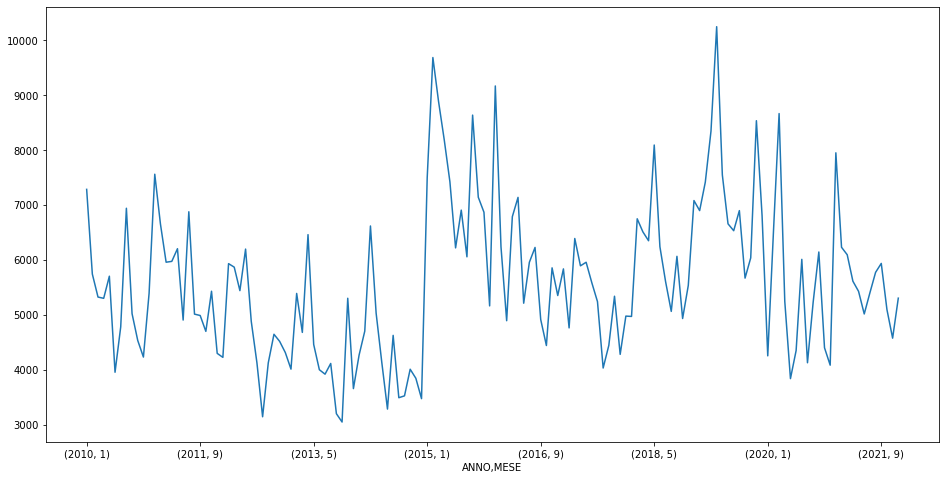

In [255]:
plt.figure(figsize=(16,8))

months = [(x, y) for x in range(2010, 2022) for y in range(1, 13)]
ds = permanent_jobs.groupby(["ANNO", "MESE"]).size().reindex(months)
ds.plot()

## Features of the series

### Seasonality

While not well defined, the autocorrelation graphs seem to suggest that there's some 12-month seasonality going on, but not really strong.

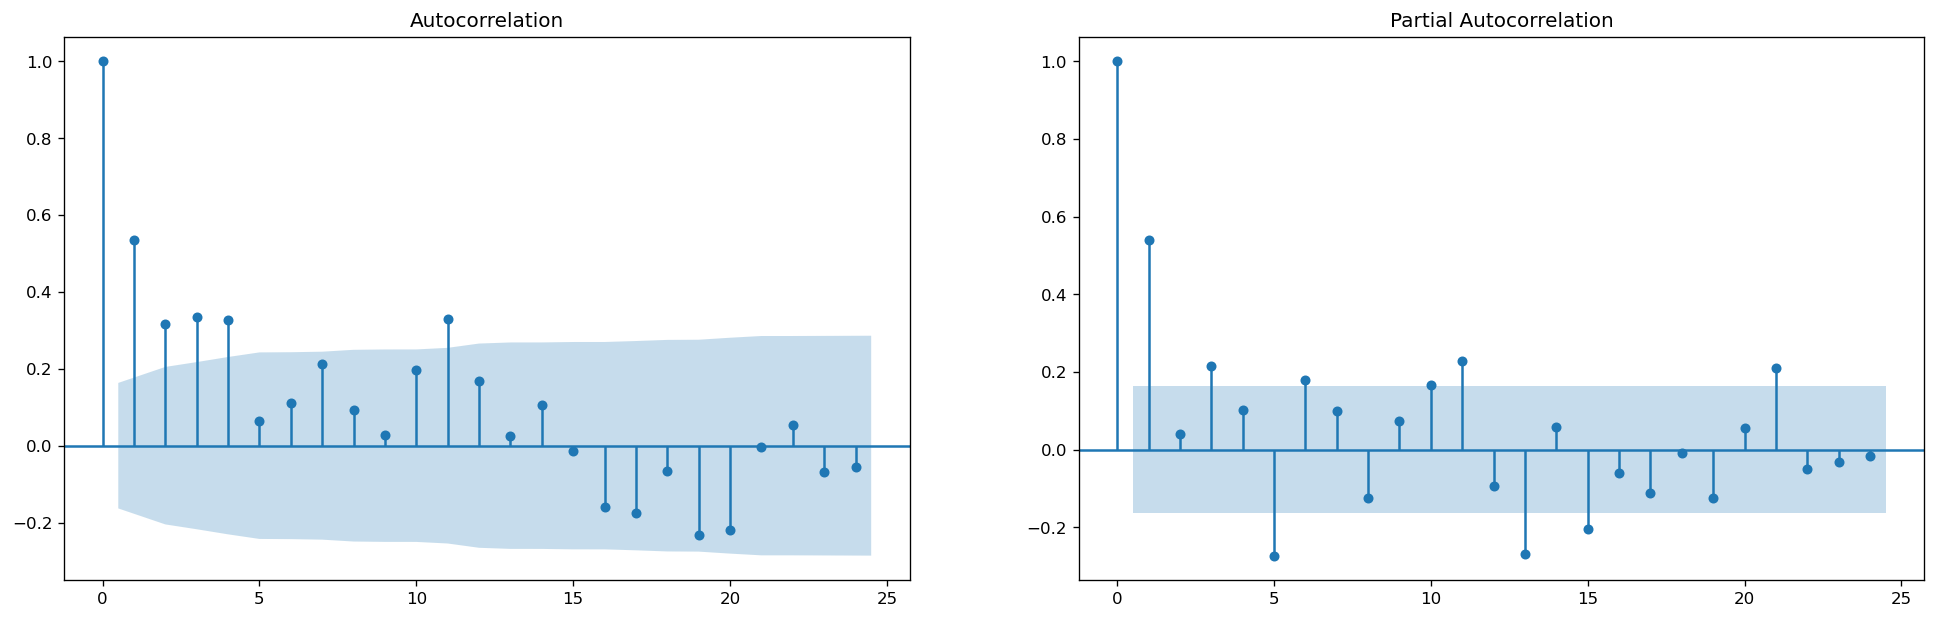

In [136]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

def get_ac(ts):
    fig, axes = plt.subplots(1,2,figsize=(20,6), dpi= 120)
    plot_acf(ts.to_list(), lags=24, ax=axes[0])
    plot_pacf(ts.to_list(), lags=24, ax=axes[1])
    plt.show()
    
get_ac(ds)

### Seasonal decomposition

Additive and multiplicative decompositions seem to confirm the impression that the time series has a seasonality but not really strong. Neither the additive nor the multiplicative models seem to fit perfectly.

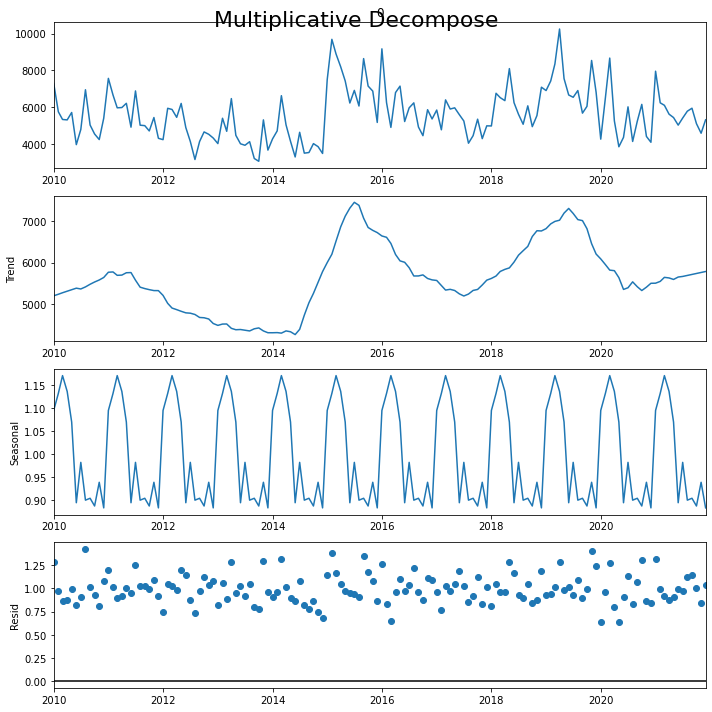

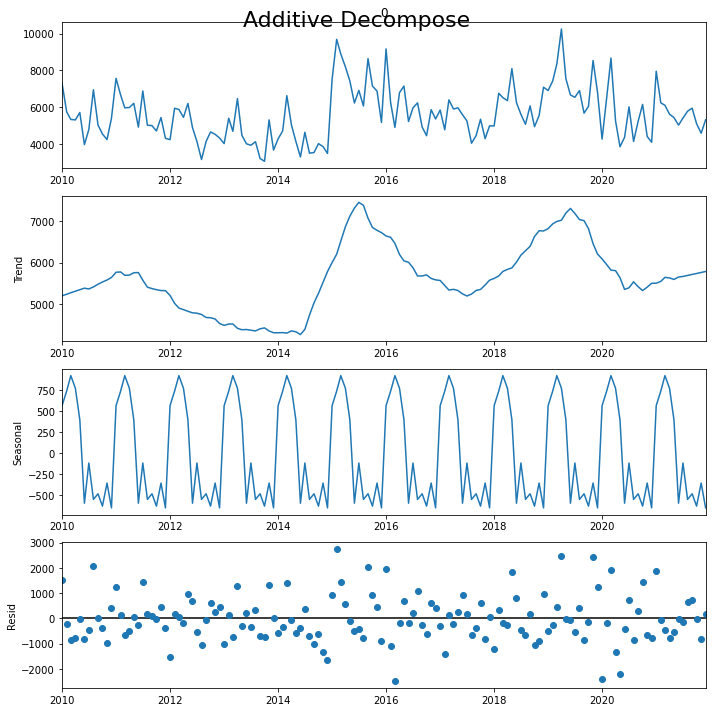

In [153]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

def seas_dec(ts):
    # Multiplicative Decomposition 
    result_mul = seasonal_decompose(ts, model='multiplicative', extrapolate_trend='freq')

    # Additive Decomposition
    result_add = seasonal_decompose(ts, model='additive', extrapolate_trend='freq')

    # Plot
    plt.rcParams.update({'figure.figsize': (10,10)})
    result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
    result_add.plot().suptitle('Additive Decompose', fontsize=22)
    plt.show()
    
ts = ds.reset_index().reset_index()
ts["DATA"] = ts["ANNO"].astype(str) + "/" + ts["MESE"].astype(str) + "/01"
ts["DATA"] = pd.to_datetime(ts["DATA"])
ts = ts.set_index("DATA")[0]
    
seas_dec(ts)

### Stationarity

The first derivative of the series appears to be stationary.

In [154]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(ts)
print('Series:')
print('\tADF Statistic: %f' % results[0])
print('\tp-value: %f' % results[1])
print()

results = adfuller(ts.diff().dropna())
print('First derivative:')
print('\tADF Statistic: %f' % results[0])
print('\tp-value: %f' % results[1])

Series:
	ADF Statistic: -2.573104
	p-value: 0.098685

First derivative:
	ADF Statistic: -3.800374
	p-value: 0.002903


# Let's do some prediction

We will use SARIMA because in my opinion a statistical approach is better in this case (we don't have many data points in our time series, they're 132).

In [446]:
from pmdarima.arima import auto_arima

def get_arima_pred(ts, column=0, with_plot=False, with_best_values=False, standardize=False):
    # Reindex     
    ts = ts.reindex([(x, y) for x in range(2010, 2022) for y in range(1, 13)])
    
    # Time series standardization
    if(standardize):
        ts = (ts - ts.mean()) / ts.std()
    
    # Adjust dataset format
    ts = ts.reset_index().reset_index()
    ts["DATA"] = ts["ANNO"].astype(str) + "/" + ts["MESE"].astype(str) + "/01"
    ts["DATA"] = pd.to_datetime(ts["DATA"])
    ts = ts.set_index("DATA")[column]
    ts = ts.fillna(0)
    ts = ts.rename('y')

    # Remove covid period
    ts_no_covid = ts[:'2020-01-01']

    # Train/Test split
    train_size = 0.80
    split_idx = round(len(ts_no_covid) * train_size)

    # Split
    train = ts_no_covid.iloc[:split_idx]
    test = ts_no_covid.iloc[split_idx:]

    model = auto_arima(   train,
                          start_p=1,
                          start_q=1,
                          information_criterion='aic',
                          test='adf',
                          start_P=1,
                          start_Q=1,
                          m = 12,
                          seasonal=True,
                          trace=False,
                          error_action="ignore",
                          suppress_warnings=True,
                          stepwise=True,
                          with_intercept=False)

    if(with_best_values):
        print(f"Best SARIMA order: {model.order}{model.seasonal_order}")
    
    ts_no_covid.index = pd.DatetimeIndex(ts_no_covid.index.values, freq="infer")
    results = SARIMAX(ts_no_covid, order=model.order, seasonal_order=model.seasonal_order).fit(disp=False)

    # Create SARIMA mean forecast
    forecast = results.get_forecast(steps=23)
    lower = forecast.conf_int()["lower y"]
    upper = forecast.conf_int()["upper y"]

    if(with_plot):
        # Plot mean SARIMA predictions
        fig,ax = plt.subplots(1,1,figsize=(20,8))

        plt.plot(ts, label='original')
        plt.plot(forecast.predicted_mean, label='SARIMA', c="r")
        plt.fill_between(forecast.conf_int().index, 
                         lower,upper,
                         color='pink')
        plt.plot(pd.DatetimeIndex(['2020-01-01', '2020-02-01']), [ts_no_covid[-1], forecast.predicted_mean[0]], c="r", ls='--')
        plt.xlabel('Date')
        plt.ylabel('New jobs')
        plt.legend()
        plt.show()
        
    return ts['2020-01-01':].sum() - forecast.predicted_mean.sum()

Best SARIMA order: (1, 1, 1)(0, 0, 1, 12)


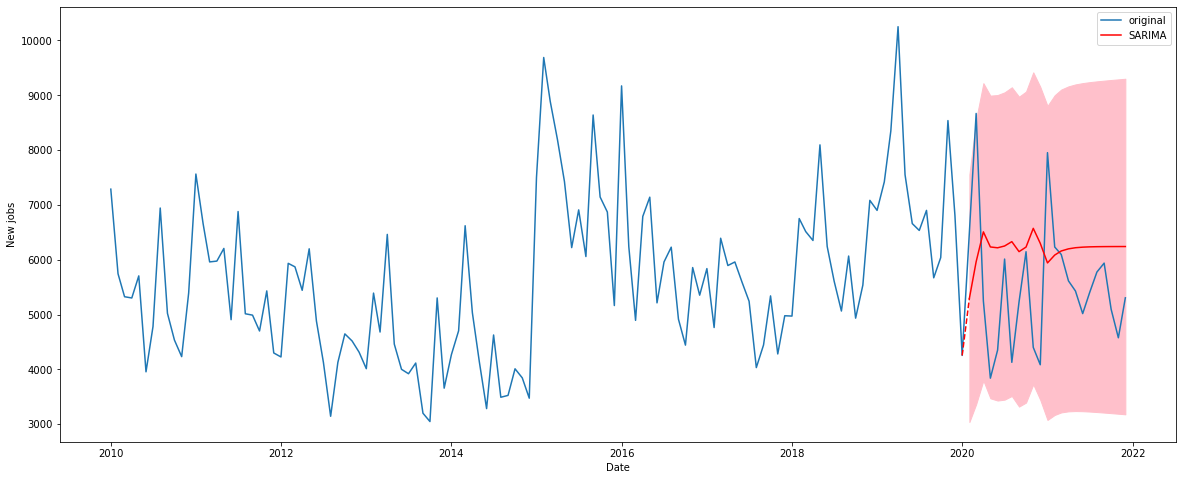

-11014.063130884577

In [448]:
ds = permanent_jobs.groupby(["ANNO", "MESE"]).size()
get_arima_pred(ds, with_plot=True, with_best_values=True)

## Let's do an accrocchio to find out which are the most affected categories

In [449]:
ds = permanent_jobs.groupby(["ANNO", "MESE", "GENERE"]).size()

for _ in range(ds.index.nlevels - 2):
    ds = ds.unstack()
        
results = []
for col in pd.DataFrame(ds).columns:
    results.append((col, get_arima_pred(ds, standardize=True, column=col)))
    
sorted(results, reverse=True, key=lambda x: abs(x[1]))

[('M', -13.711316931193263), ('F', -12.112144947259782)]